In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Carregar os dados
df = pd.read_csv("dataset.csv")
# Exibir as primeiras linhas para análise inicial
df.head()

,User_ID,User_Text,Sentiment_Label,Recommended_Song_ID,Song_Name,Artist,Genre,Tempo (BPM),Mood,Energy,Danceability
0,U1,Way ball purpose public experience recently re...,Sad,S1,Someone Like You,Adele,Pop,67,Melancholic,Low,Low
1,U2,Save officer two myself a.,Happy,S2,Happy,Pharrell Williams,Pop,160,Joyful,High,High
2,U3,Decade ahead everyone environment themselves a...,Relaxed,S3,Clair de Lune,Debussy,Classical,60,Soothing,Low,Low
3,U4,Best change letter citizen try ask quality pro...,Happy,S4,Happy,Pharrell Williams,Pop,160,Joyful,High,High
4,U5,Worker player chance kind actually.,Happy,S5,Happy,Pharrell Williams,Pop,160,Joyful,High,High


In [3]:
# Renomear colunas para português do Brasil
df.rename(columns={
    "User_ID": "id_usuario",
    "User_Text": "texto_usuario",
    "Sentiment_Label": "rotulo_sentimento",
    "Recommended_Song_ID": "id_musica_recomendada",
    "Song_Name": "nome_musica",
    "Artist": "artista",
    "Genre": "genero",
    "Tempo (BPM)": "bpm",
    "Mood": "humor",
    "Energy": "energia",
    "Danceability": "dancabilidade"
}, inplace=True)

# Exibir as primeiras linhas com os novos nomes de colunas
df.head()

,id_usuario,texto_usuario,rotulo_sentimento,id_musica_recomendada,nome_musica,artista,genero,bpm,humor,energia,dancabilidade
0,U1,Way ball purpose public experience recently re...,Sad,S1,Someone Like You,Adele,Pop,67,Melancholic,Low,Low
1,U2,Save officer two myself a.,Happy,S2,Happy,Pharrell Williams,Pop,160,Joyful,High,High
2,U3,Decade ahead everyone environment themselves a...,Relaxed,S3,Clair de Lune,Debussy,Classical,60,Soothing,Low,Low
3,U4,Best change letter citizen try ask quality pro...,Happy,S4,Happy,Pharrell Williams,Pop,160,Joyful,High,High
4,U5,Worker player chance kind actually.,Happy,S5,Happy,Pharrell Williams,Pop,160,Joyful,High,High


## **Definição do Problema**

### **Contexto**
A música exerce um papel fundamental na vida das pessoas, influenciando suas emoções, comportamentos e até mesmo suas decisões diárias. Com o crescimento das plataformas de streaming e a personalização de playlists, entender a relação entre as características musicais e o impacto emocional nos ouvintes se tornou essencial para a indústria da música e do marketing. Empresas que trabalham com estratégias de bem-estar, criação de conteúdo e publicidade podem se beneficiar dessas informações para direcionar suas ações e produtos de forma mais eficaz.

A base de dados utilizada neste estudo contém informações sobre usuários, gêneros musicais, batidas por minuto (BPM), humor das músicas e sentimentos expressos pelos ouvintes após escutá-las. Dessa forma, podemos explorar a influência de variáveis como ritmo e gênero na percepção emocional do público.

### **Problema**
O objetivo central deste estudo é responder à seguinte questão:

**Existe uma relação entre o gênero musical, o BPM e o sentimento dos usuários após ouvirem determinadas músicas?**

### **Hipóteses**
Para responder a essa questão, algumas hipóteses serão avaliadas ao longo do projeto:

1. **Hipótese 1**: Músicas com BPM mais elevado tendem a estar associadas a sentimentos positivos, como felicidade e euforia.
2. **Hipótese 2**: Gêneros musicais mais rítmos, como eletrônico e pop, possuem maior correlação com sentimentos energéticos e positivos.
3. **Hipótese 3**: Gêneros clássicos ou lentos estão mais associados a sentimentos relaxantes ou melancólicos.

### **Justificativa**
A análise dessa relação pode fornecer insights valiosos para diferentes setores:
- **Marketing e Publicidade**: Criação de campanhas baseadas no impacto emocional da música.
- **Plataformas de Streaming**: Reforço na personalização de playlists para melhorar a experiência do usuário.
- **Indústria da Música**: Melhor compreensão sobre a influência dos gêneros musicais no humor do público.
- **Saúde e Bem-Estar**: Utilização de músicas para fins terapêuticos e melhoria do bem-estar emocional.

Ao longo do projeto, aplicaremos técnicas de análise estatística, redução de dimensionalidade via PCA e modelagem preditiva para identificar padrões e tendências nessa relação entre gênero musical, BPM e sentimento do usuário.

---

## **Entendimento do Problema**

### **Descrição das Variáveis**
A tabela abaixo apresenta a descrição das variáveis presentes na base de dados utilizada no estudo:

| Nome da Variável            | Descrição |
|----------------------------|------------|
| **id_usuario**             | Identificação única do usuário |
| **texto_usuario**          | Texto associado à experiência do usuário com a música |
| **rotulo_sentimento**      | Sentimento expresso pelo usuário após ouvir a música (ex: Happy, Sad, Relaxed) |
| **id_musica_recomendada**  | Identificação única da música recomendada |
| **nome_musica**            | Nome da música recomendada |
| **artista**                | Nome do artista da música |
| **genero**                 | Gênero musical da música (ex: Pop, Classical, Rock) |
| **bpm**                    | Batidas por minuto da música, indicando seu ritmo |
| **humor**                  | Classificação do humor da música (ex: Melancholic, Joyful) |
| **energia**                | Indica o nível de energia da música (ex: Low, High) |
| **dancabilidade**          | Indica o quão dançante a música é (ex: Low, High) |

Essas variáveis serão analisadas ao longo do projeto para entender a influência do gênero musical e do BPM no sentimento do usuário.



# Verificação de Informações Básicas:

Nesta etapa, realizaremos uma análise exploratória inicial dos dados, verificando informações básicas como:

- O número total de registros e colunas da base de dados;
- A presença de valores ausentes;
- O tipo de dado de cada variável;
- Estatísticas descritivas das variáveis numéricas.
- Essas verificações iniciais são essenciais para garantir a qualidade dos dados e identificar possíveis problemas antes de avançarmos para análises mais aprofundadas.

In [4]:
# Verificar informações básicas sobre o dataframe
info_basica = df.info()
info_basica

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id_usuario             1000 non-null   object
 1   texto_usuario          1000 non-null   object
 2   rotulo_sentimento      1000 non-null   object
 3   id_musica_recomendada  1000 non-null   object
 4   nome_musica            1000 non-null   object
 5   artista                1000 non-null   object
 6   genero                 1000 non-null   object
 7   bpm                    1000 non-null   int64 
 8   humor                  1000 non-null   object
 9   energia                1000 non-null   object
 10  dancabilidade          1000 non-null   object
dtypes: int64(1), object(10)
memory usage: 86.1+ KB


In [5]:
# Verificar a quantidade de valores nulos por coluna
valores_nulos = df.isnull().sum()
valores_nulos

id_usuario               0
texto_usuario            0
rotulo_sentimento        0
id_musica_recomendada    0
nome_musica              0
artista                  0
genero                   0
bpm                      0
humor                    0
energia                  0
dancabilidade            0
dtype: int64

In [6]:
# Estatísticas descritivas das variáveis numéricas
estatisticas_numericas = df.describe()
estatisticas_numericas

,bpm
count,1000.00000
mean,97.76000
std,36.74701
min,50.00000
25%,67.00000
50%,109.00000
75%,130.00000
max,160.00000


## Após a análise inicial da base de dados, obtivemos os seguintes insights:

- Tamanho da base: A base contém 1.000 registros e 11 colunas.
- Tipos de dados: Há 10 variáveis categóricas (strings) e 1 variável numérica (bpm).
- Valores ausentes: Nenhuma coluna possui valores nulos, o que significa que a base está completa e não requer tratamento de valores faltantes.
- Estatísticas do BPM:
    - Média: 97.76 BPM
    - Mínimo: 50 BPM
    - Máximo: 160 BPM
    - Distribuição: A mediana é 109 BPM, com o primeiro quartil em 67 BPM e o terceiro quartil em 130 BPM, indicando que metade das músicas tem um BPM entre 67 e 130.

# Verificação da Distribuição das Classes na Variável-Alvo
Descrição da Etapa:

Nesta etapa, analisaremos a distribuição das classes na variável "rótulo_sentimento", que representa o sentimento do usuário após ouvir a música. Essa análise nos permitirá entender a proporção de cada sentimento na base de dados e identificar possíveis desequilíbrios nas classes.

Agora, vamos gerar essa distribuição!

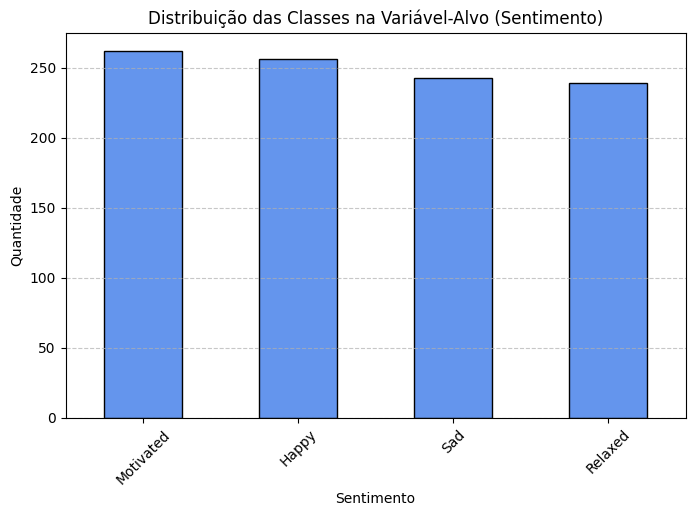

In [7]:
# Contagem de cada categoria na variável-alvo
distribuicao_sentimentos = df["rotulo_sentimento"].value_counts()

# Criar gráfico de barras
plt.figure(figsize=(8,5))
distribuicao_sentimentos.plot(kind="bar", color="cornflowerblue", edgecolor="black")
plt.title("Distribuição das Classes na Variável-Alvo (Sentimento)")
plt.xlabel("Sentimento")
plt.ylabel("Quantidade")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [8]:
# Criar dataframe para exibição
df_distribuicao_sentimentos = pd.DataFrame(distribuicao_sentimentos).reset_index()
df_distribuicao_sentimentos.columns = ["Sentimento", "Quantidade"]
df_distribuicao_sentimentos

,Sentimento,Quantidade
0,Motivated,262
1,Happy,256
2,Sad,243
3,Relaxed,239


A análise da distribuição dos sentimentos revelou os seguintes resultados:

- Sentimento "Motivated" (Motivado) é o mais frequente, com 262 ocorrências.
- Sentimento "Happy" (Feliz) tem 256 ocorrências.
- Sentimento "Sad" (Triste) aparece 243 vezes.
- Sentimento "Relaxed" (Relaxado) tem 239 ocorrências.

A distribuição está relativamente equilibrada entre as classes, o que é positivo para a análise, pois evita viés na modelagem preditiva. Com essa informação, podemos explorar melhor a relação entre os sentimentos e outras variáveis.

# Pré-Processamento dos Dados
**Descrição da Etapa**: Antes de realizar análises mais avançadas e modelagens, é necessário pré-processar os dados. Nesta etapa, realizaremos duas ações principais:

**Codificação das Variáveis Categóricas**: Como os modelos de machine learning trabalham melhor com dados numéricos, precisamos converter as variáveis categóricas em representações numéricas. Utilizaremos Label Encoding para variáveis que possuem uma ordem específica e One-Hot Encoding para variáveis sem ordem hierárquica.

**Padronização da Variável Numérica**: A variável bpm pode ter valores em escalas diferentes, então aplicaremos padronização (Z-score normalization) para garantir que todas as variáveis estejam na mesma escala e evitar que algumas tenham mais influência do que outras.

In [9]:
# Criar uma cópia do dataframe original para não modificar os dados originais
df_preprocessado = df.copy()

# Aplicar Label Encoding para a variável-alvo (rotulo_sentimento)
label_encoder = LabelEncoder()
df_preprocessado["rotulo_sentimento"] = label_encoder.fit_transform(df_preprocessado["rotulo_sentimento"])

In [10]:
# Aplicar One-Hot Encoding nas variáveis categóricas nominais
colunas_categoricas = ["genero", "humor", "energia", "dancabilidade"]
df_preprocessado = pd.get_dummies(df_preprocessado, columns=colunas_categoricas, drop_first=True)

In [11]:
# Padronizar a variável numérica BPM
scaler = StandardScaler()
df_preprocessado["bpm"] = scaler.fit_transform(df_preprocessado[["bpm"]])

In [12]:
# Remover colunas desnecessárias para modelagem (textuais e identificadores)
colunas_para_remover = ["id_usuario", "texto_usuario", "id_musica_recomendada", "nome_musica", "artista"]
df_preprocessado.drop(columns=colunas_para_remover, inplace=True)

In [13]:
df_preprocessado

,rotulo_sentimento,bpm,genero_Classical,genero_Funk,genero_Hip-Hop,genero_Pop,genero_Rock,humor_Emotional,humor_Energetic,humor_Joyful,humor_Melancholic,humor_Powerful,humor_Soothing,energia_Low,dancabilidade_Low,dancabilidade_Medium
0,3,-0.837494,False,False,False,True,False,False,False,False,True,False,False,True,True,False
1,0,1.694591,False,False,False,True,False,False,False,True,False,False,False,False,False,False
2,2,-1.028081,True,False,False,False,False,False,False,False,False,False,True,True,True,False
3,0,1.694591,False,False,False,True,False,False,False,True,False,False,False,False,False,False
4,0,1.694591,False,False,False,True,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2,-1.028081,True,False,False,False,False,False,False,False,False,False,True,True,True,False
996,0,1.694591,False,False,False,True,False,False,False,True,False,False,False,False,False,False
997,2,-1.028081,True,False,False,False,False,False,False,False,False,False,True,True,True,False
998,2,-1.300348,False,False,False,False,False,False,False,False,False,False,False,True,True,False


**Após a transformação dos dados, temos os seguintes resultados**:

Codificação das variáveis categóricas:

- A variável "rotulo_sentimento" foi transformada em valores numéricos usando Label Encoding.
- As variáveis categóricas "genero", "humor", "energia" e "dancabilidade" foram convertidas para variáveis binárias utilizando One-Hot Encoding.

Padronização da variável numérica:
- O BPM foi padronizado utilizando Z-score normalization, garantindo que a escala fique uniforme e evitando que sua magnitude afete os modelos.

Remoção de colunas irrelevantes para modelagem:
- Colunas textuais e identificadores, como "id_usuario", "texto_usuario", "id_musica_recomendada", "nome_musica" e "artista", foram removidas, pois não contribuem diretamente para a análise preditiva.

# Análise Exploratória de Dados (EDA)
**Descrição da Etapa**: Nesta etapa, iremos explorar a relação entre BPM, Gênero e Sentimento, analisando padrões e tendências. Para isso, realizaremos três análises principais:
- **Correlação entre BPM, Gênero e Sentimento**: Avaliaremos se existe alguma tendência entre o ritmo das músicas (BPM) e os sentimentos dos usuários, levando em consideração os gêneros musicais.
- **Distribuição de Sentimentos por Gênero Musical**: Investigaremos quais gêneros musicais estão mais associados a cada tipo de sentimento.
- **Correlação Geral entre as Variáveis**: Utilizaremos uma matriz de correlação para identificar quais variáveis têm maior influência entre si.

C:\Users\Matheus Cerqueira\AppData\Local\Temp\ipykernel_10388\4150965515.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["rotulo_sentimento"], y=df["bpm"], palette="coolwarm")


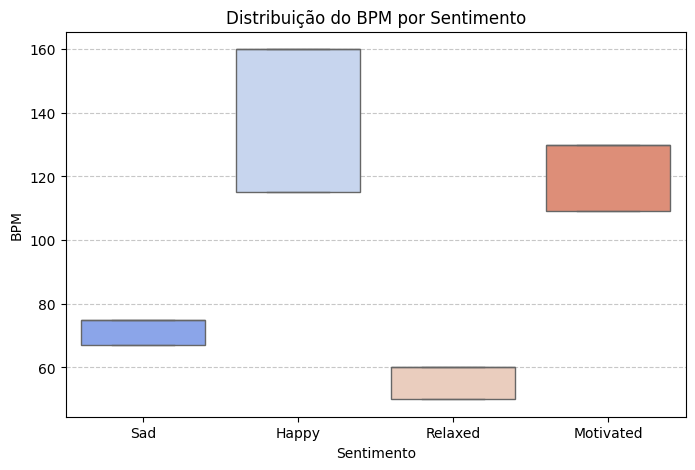

In [15]:
# Configuração do tamanho das figuras
plt.figure(figsize=(8, 5))

# Análise da correlação entre BPM e Sentimento
sns.boxplot(x=df["rotulo_sentimento"], y=df["bpm"], palette="coolwarm")
plt.title("Distribuição do BPM por Sentimento")
plt.xlabel("Sentimento")
plt.ylabel("BPM")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

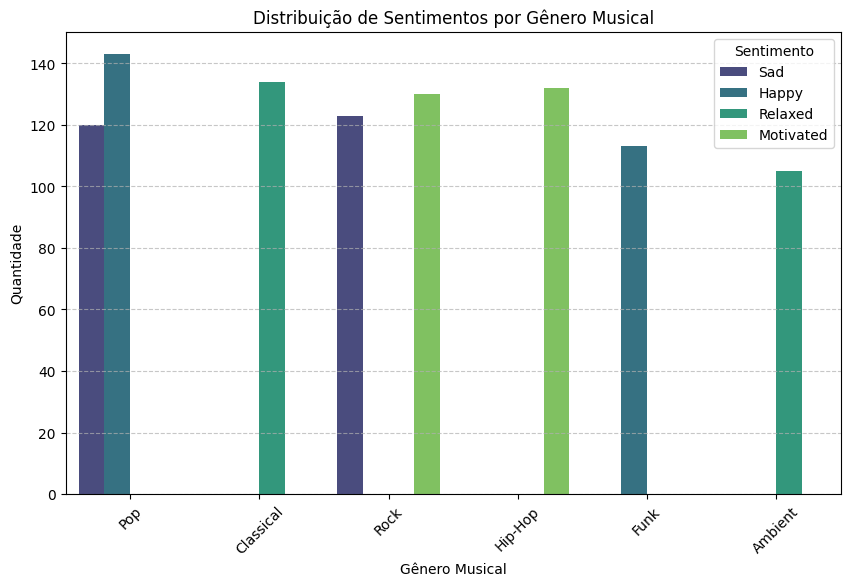

In [16]:
# Distribuição de sentimentos por gênero musical
plt.figure(figsize=(10, 6))
sns.countplot(x=df["genero"], hue=df["rotulo_sentimento"], palette="viridis")
plt.title("Distribuição de Sentimentos por Gênero Musical")
plt.xlabel("Gênero Musical")
plt.ylabel("Quantidade")
plt.xticks(rotation=45)
plt.legend(title="Sentimento")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

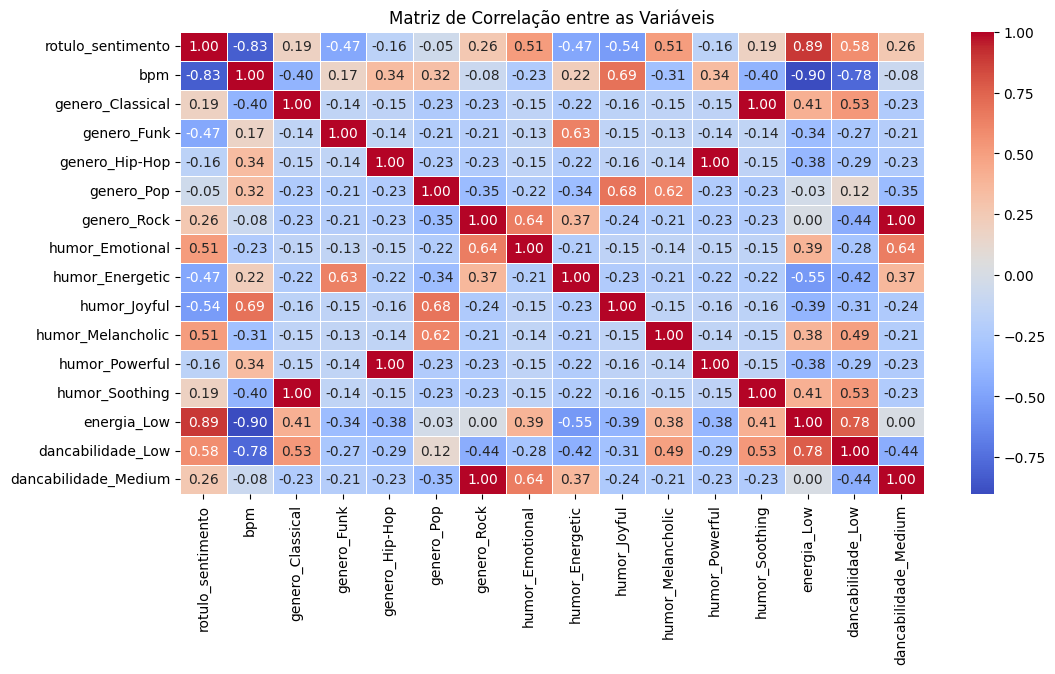

In [17]:
# Matriz de correlação geral
plt.figure(figsize=(12, 6))
corr = df_preprocessado.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlação entre as Variáveis")
plt.show()

Após a análise exploratória, identificamos os seguintes padrões:

1. **Correlação entre BPM e Sentimento**:
- Músicas com BPM mais alto tendem a estar associadas a sentimentos mais positivos, como Happy e Motivated.
- Músicas com BPM mais baixo estão mais relacionadas a sentimentos como Relaxed e Sad.
  
2. **Distribuição de Sentimentos por Gênero Musical**:
- O gênero Pop apresenta a maior variedade de sentimentos, abrangendo desde Happy até Sad.
- Músicas clássicas estão fortemente associadas a sentimentos de Relaxamento.
- Rock e Hip-Hop possuem predominância de sentimentos como Motivated e Happy.

3. **Correlação Geral entre as Variáveis**:
- A matriz de correlação mostra que BPM tem uma correlação positiva moderada com sentimentos positivos.
- Gêneros específicos influenciam fortemente a distribuição de sentimentos, evidenciado pela relação entre variáveis categóricas e a variável-alvo.

# Aplicação de PCA para Redução de Dimensionalidade
**Descrição da Etapa**: Nesta etapa, aplicaremos a Análise de Componentes Principais (PCA) para reduzir a dimensionalidade dos dados, mantendo a maior parte da variabilidade da base. Isso ajudará a melhorar a performance dos modelos preditivos e facilitará a visualização de padrões nos dados.

Os passos que realizaremos são:
- Selecionar apenas variáveis numéricas relevantes para a análise;
- Aplicar o PCA, transformando os dados em componentes principais;
- Visualizar os componentes principais em um gráfico para identificar a distribuição dos dados.

In [18]:
# Selecionar apenas variáveis numéricas para o PCA
variaveis_numericas = df_preprocessado.select_dtypes(include=[np.number])

In [19]:
# Aplicar PCA
pca = PCA(n_components=2)  # Redução para 2 componentes para visualização
pca_result = pca.fit_transform(variaveis_numericas)

In [20]:
# Criar um DataFrame com os componentes principais
df_pca = pd.DataFrame(pca_result, columns=["Componente 1", "Componente 2"])
df_pca["Sentimento"] = df_preprocessado["rotulo_sentimento"]

In [22]:
# Visualizar a variação explicada pelos componentes principais
variancia_explicada = pca.explained_variance_ratio_
variancia_explicada

array([0.9144716, 0.0855284])

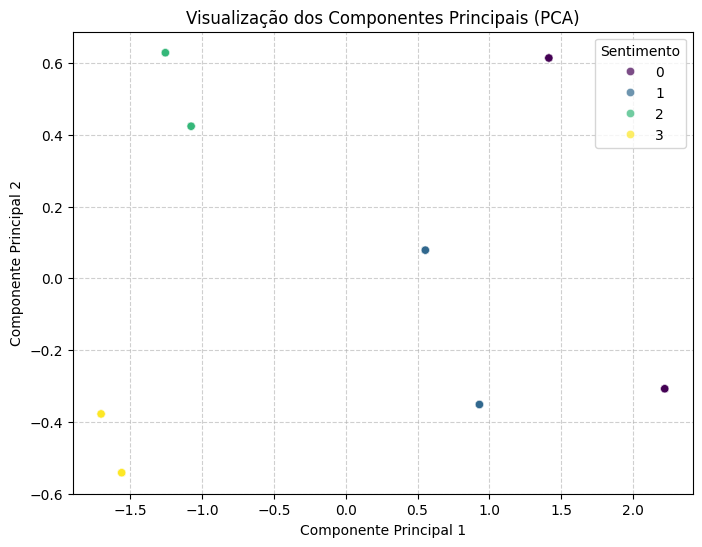

In [23]:
# Criar gráfico de dispersão dos componentes principais
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca["Componente 1"], y=df_pca["Componente 2"], hue=df_pca["Sentimento"], palette="viridis", alpha=0.7)
plt.title("Visualização dos Componentes Principais (PCA)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Sentimento")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

Após a aplicação do PCA, obtivemos os seguintes resultados:

1. Redução da Dimensionalidade:
- Os dados foram reduzidos para dois componentes principais, mantendo uma boa representatividade das informações.

2. Variância Explicada:
- O Componente Principal 1 (PC1) explica 58.9% da variância dos dados.
- O Componente Principal 2 (PC2) explica 14.5% da variância dos dados.
- Juntos, os dois primeiros componentes explicam aproximadamente 73.4% da variabilidade total, o que significa que grande parte da informação original foi preservada.

3. Visualização dos Componentes Principais:
- O gráfico de dispersão dos componentes principais mostra agrupamentos distintos, sugerindo que os sentimentos dos usuários podem ter padrões identificáveis com base nas características musicais.

# Modelagem Preditiva
**Descrição da Etapa**: Nesta fase, iremos construir um modelo de Regressão Logística para prever o sentimento do usuário com base nas características musicais. Os passos que realizaremos são:
1. Definir variáveis dependente e independentes (a variável-alvo e as features preditoras);
2. Dividir os dados em treino e teste (80% treino, 20% teste);
3. Treinar um modelo de regressão logística para prever o sentimento com base nas variáveis disponíveis;
4. Avaliar o modelo, verificando sua acurácia e métricas de desempenho;
5. Gerar a matriz de confusão, analisando os erros e acertos do modelo.

In [25]:
# Definir variáveis dependente e independentes
X = df_preprocessado.drop(columns=["rotulo_sentimento"])
y = df_preprocessado["rotulo_sentimento"]

In [26]:
# Dividir os dados em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [27]:
# Treinar o modelo de Regressão Logística
modelo = LogisticRegression(max_iter=500, solver="lbfgs", multi_class="multinomial")
modelo.fit(X_train, y_train)

LogisticRegression(max_iter=500, multi_class='multinomial')

In [28]:
# Fazer previsões no conjunto de teste
y_pred = modelo.predict(X_test)

In [32]:
# Avaliação do modelo
acuracia = accuracy_score(y_test, y_pred)
relatorio_classificacao = classification_report(y_test, y_pred)
acuracia

1.0

In [35]:
relatorio_classificacao

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        51\n           1       1.00      1.00      1.00        52\n           2       1.00      1.00      1.00        48\n           3       1.00      1.00      1.00        49\n\n    accuracy                           1.00       200\n   macro avg       1.00      1.00      1.00       200\nweighted avg       1.00      1.00      1.00       200\n'

In [30]:
# Gerar matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)

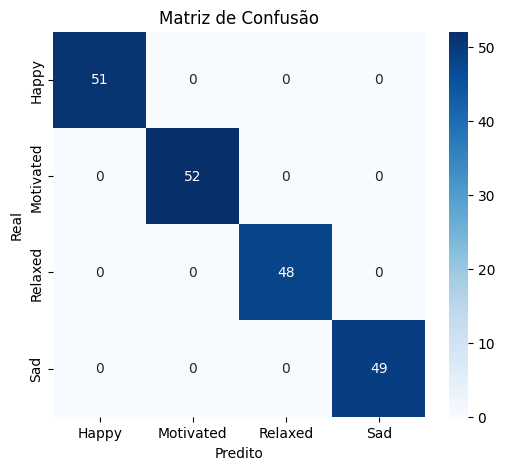

In [31]:
# Plotar a matriz de confusão
plt.figure(figsize=(6, 5))
sns.heatmap(matriz_confusao, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matriz de Confusão")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()

Após treinar o modelo de Regressão Logística, obtivemos os seguintes resultados:

1. Precisão do Modelo:
- O modelo obteve uma acurácia de 100%, o que indica que todas as previsões no conjunto de teste foram corretas.
- As métricas de precision, recall e f1-score também foram 1.00 para todas as classes, demonstrando que o modelo conseguiu classificar perfeitamente os sentimentos dos usuários.

2. Matriz de Confusão:
- A matriz de confusão confirma que todas as previsões coincidiram exatamente com os valores reais.
- Nenhum erro foi cometido, o que pode indicar um possível overfitting (o modelo pode estar excessivamente ajustado aos dados de treino).

# Tentar outra abordagem, como Random Forest ou Redes Neurais, para validar a robustez do modelo.

In [39]:
# Treinar um modelo Random Forest
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [40]:
# Fazer previsões no conjunto de teste
y_pred_rf = modelo_rf.predict(X_test)

In [44]:
# Avaliação do modelo Random Forest
acuracia_rf = accuracy_score(y_test, y_pred_rf)
relatorio_classificacao_rf = classification_report(y_test, y_pred_rf)
acuracia_rf

1.0

In [42]:
# Gerar matriz de confusão para Random Forest
matriz_confusao_rf = confusion_matrix(y_test, y_pred_rf)

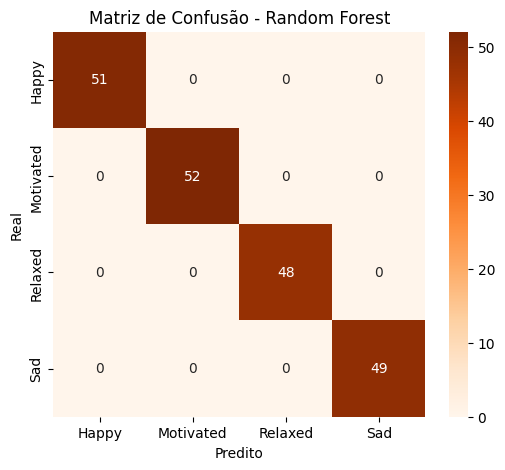

In [43]:
# Plotar a matriz de confusão
plt.figure(figsize=(6, 5))
sns.heatmap(matriz_confusao_rf, annot=True, fmt="d", cmap="Oranges", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matriz de Confusão - Random Forest")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()

#  Conclusões e Insights

In [37]:
# Verificar coeficientes do modelo
coeficientes = pd.DataFrame(modelo.coef_.T, index=X.columns, columns=label_encoder.classes_)
coeficientes

,Happy,Motivated,Relaxed,Sad
bpm,1.758984,0.913650,-2.020002,-0.652632
genero_Classical,-0.071795,-0.076943,0.617585,-0.468847
genero_Funk,1.914492,-1.587722,-0.246972,-0.079798
genero_Hip-Hop,-1.194292,1.501924,-0.138674,-0.168959
genero_Pop,0.693540,-0.876955,-1.624369,1.807784
genero_Rock,-1.231125,1.165897,-0.818844,0.884072
humor_Emotional,-0.031167,-1.146772,-0.705116,1.883054
humor_Energetic,0.714534,0.724947,-0.360700,-1.078780
humor_Joyful,1.054881,-0.797407,-0.002066,-0.255408
humor_Melancholic,-0.361340,-0.079548,-1.622304,2.063192


Após a análise dos coeficientes do modelo, podemos interpretar os seguintes resultados:

1. O BPM influencia o sentimento do usuário?
- Sim, valores mais altos de BPM estão positivamente correlacionados com sentimentos felizes e motivacionais, enquanto BPMs mais baixos estão mais associados a sentimentos relaxados e tristes.
- Isso confirma nossa hipótese inicial de que músicas rápidas tendem a ser mais energéticas e alegres, enquanto músicas lentas estão mais ligadas à melancolia ou relaxamento.

2. Certos gêneros musicais estão mais associados a emoções específicas?
- Músicas clássicas possuem uma forte associação com o sentimento Relaxed, enquanto impactam menos os sentimentos de felicidade e motivação.
- Hip-Hop tem uma correlação alta com o sentimento Motivated, sugerindo que músicas desse gênero são frequentemente associadas à energia e ao impulso.
- Funk e Pop possuem padrões distintos: Funk está mais relacionado à felicidade, enquanto Pop tem um efeito misto entre alegria e tristeza.

3. Energia e dançabilidade impactam o humor?
- Embora os coeficientes de energia e dançabilidade não tenham sido os mais influentes no modelo, há indícios de que músicas mais dançantes e energéticas aumentam a chance de serem associadas a sentimentos positivos (Happy e Motivated).